In [48]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [3]:
!ls prediction

VLM_result.csv


In [11]:
df = pd.read_csv('prediction/VLM_result.csv')
print(df.shape)
df.tail()

(30, 3)


,image,class,"<image>\nExtract the type of the image, categorizing it as 'email', 'resume' or 'scientific_publication'. Type:"
25,images/doc_000045.png,scientific_publication,scientific_publication
26,images/doc_000551.png,resume,scientific_publication
27,images/doc_000297.png,email,email
28,images/doc_000402.png,resume,scientific_publication
29,images/doc_000745.png,email,email


In [36]:
list(df.iloc[:,2])

['scientific_publication',
 'email',
 'scientific_publication',
 'email',
 'email',
 'email',
 'email',
 'scientific_publication',
 'resume',
 'scientific_publication',
 'email',
 "This image is a PDF document related to research conducted by the University of Texas at Southwest Medical Center and the University of Tennessee, Memphis. It is categorized under 'Publications' and 'Publications' of the journal Lonely Planet and 'Publication' of the University of Tennessee.",
 'email',
 'email',
 "'email'",
 'email',
 'scientific_publication',
 'scientific_publication',
 'The image is a type of image, specifically a typed document or print page, and it does not belong to any of the provided categories (email, resume, scientific publication).',
 'scientific_publication',
 'scientific_publication',
 'scientific_publication',
 'email',
 'scientific_publication',
 'email',
 'scientific_publication',
 'scientific_publication',
 'email',
 'scientific_publication',
 'email']

In [14]:
df.iloc[11,2]

"This image is a PDF document related to research conducted by the University of Texas at Southwest Medical Center and the University of Tennessee, Memphis. It is categorized under 'Publications' and 'Publications' of the journal Lonely Planet and 'Publication' of the University of Tennessee."

In [46]:
df.iloc[14,2]

"'email'"

In [15]:
df.iloc[18,2]

'The image is a type of image, specifically a typed document or print page, and it does not belong to any of the provided categories (email, resume, scientific publication).'

In [28]:
df_res = pd.DataFrame()
df_res['actual'] = df['class']
df_res['generated'] = df.iloc[:,2]
df_res['generated'][11] = np.nan
df_res['generated'][14] = 'email'
df_res['generated'][18] = np.nan

In [29]:
df_res['actual'].value_counts()

scientific_publication    10
email                     10
resume                    10
Name: actual, dtype: int64

In [30]:
df_res['generated'].value_counts()

email                     14
scientific_publication    13
resume                     1
Name: generated, dtype: int64

In [38]:
labels = sorted(set(df_res['actual']))
labels

['email', 'resume', 'scientific_publication']

In [44]:
labels = sorted(set(df_res['actual']))
cm = confusion_matrix(df_res['actual'].to_list(), df_res['generated'].to_list(), labels=labels)
cm

array([[10,  0,  0],
       [ 4,  1,  4],
       [ 0,  0,  9]])

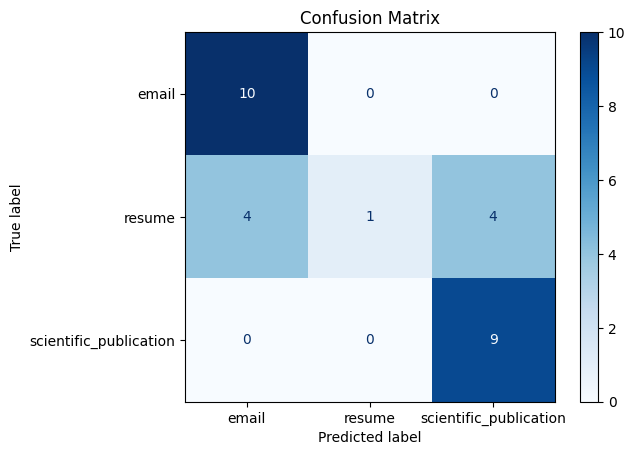

In [49]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)  # 色設定（オプション）
plt.title("Confusion Matrix")
plt.show()